In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import raw file from dataset

u = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRUDSAB.csv')

display(u.shape)# show shape and head
u[:5]


/var/folders/f1/dmgdbt5j5nb5ht5_vfxmr8gm0000gn/T/ipykernel_93281/1788243214.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  u = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRUDSAB.csv')


(24930, 66)

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,UDS013,UDS013_UNIT,UDS013_NORM,UDS013A,UDS005,...,UDS010,UDS010_UNIT,UDS010_NORM,UDS010A,UDS011,UDS011_UNIT,UDS011_NORM,UDS002_dt,AB001A_dt,patdeid
0,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,1.0,NaN,1.0,-2.0,-2.0,1
1,NaN,NaN,WK1,NaN,15037,0.0,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,6.0,6.0,1
2,NaN,NaN,WK2,NaN,15040,0.0,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,16.0,16.0,1
3,NaN,NaN,WK3,NaN,15043,0.0,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,22.0,22.0,1
4,NaN,NaN,WK4,NaN,15046,0.0,NaN,0.0,NaN,1.0,...,1.0,NaN,1.0,NaN,0.0,NaN,0.0,34.0,34.0,1


In [4]:
# observe columns

u.columns

Index(['PATIENTNUMBER', 'SITE', 'VISIT', 'PATIENTID', 'VISITID', 'UDS013',
       'UDS013_UNIT', 'UDS013_NORM', 'UDS013A', 'UDS005', 'UDS005_UNIT',
       'UDS005_NORM', 'UDS005A', 'AB001', 'AB001_UNIT', 'AB001_NORM', 'AB001A',
       'AB001B', 'AB001B_UNIT', 'AB001B_NORM', 'AB002', 'UDS001',
       'UDS001_UNIT', 'UDS001_NORM', 'UDS001A', 'UDS001A_UNIT', 'UDS001A_NORM',
       'UDS001B', 'UDS002', 'UDS003', 'UDS003_UNIT', 'UDS003_NORM', 'UDS004',
       'UDS004_UNIT', 'UDS004_NORM', 'UDS011A', 'UDS012', 'UDS012_UNIT',
       'UDS012_NORM', 'UDS012A', 'UDS006', 'UDS006_UNIT', 'UDS006_NORM',
       'UDS006A', 'UDS007', 'UDS007_UNIT', 'UDS007_NORM', 'UDS007A', 'UDS008',
       'UDS008_UNIT', 'UDS008_NORM', 'UDS008A', 'UDS009', 'UDS009_UNIT',
       'UDS009_NORM', 'UDS009A', 'UDS010', 'UDS010_UNIT', 'UDS010_NORM',
       'UDS010A', 'UDS011', 'UDS011_UNIT', 'UDS011_NORM', 'UDS002_dt',
       'AB001A_dt', 'patdeid'],
      dtype='object')

In [5]:
# drop columns that aren't being used for this project

u = u.drop(columns=[col for col in u.columns if col not in ['patdeid','VISIT','AB001','AB001B','UDS001','UDS001A','UDS001B', 'UDS003', 'UDS004', 'UDS005', 'UDS006', 'UDS007', 'UDS008', 'UDS009', 'UDS010', 'UDS011', 'UDS012', 'UDS013']])

In [6]:
# annotate column labels for interpretability

new_column_names = {'AB001':'t_alcohol','AB001B':'alc_result','UDS001':'urine_test','UDS001A':'refuse_reason','UDS001B':'other_reason', 'UDS003':'urine_temp','UDS004':'supervised','UDS005':'t_Amphetamines', 'UDS006':'t_Benzodiazapines','UDS007':'t_Methadone', 'UDS008':'t_Oxycodone', 'UDS009':'t_Cocaine', 'UDS010':'t_Methamphetamine', 'UDS011':'t_Opiate300', 'UDS012':'t_Cannabinoids', 'UDS013':'t_Propoxyphene'}

In [7]:
# execute rename columns
u = u.rename(columns=new_column_names)

u[:5]

,VISIT,t_Propoxyphene,t_Amphetamines,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Cannabinoids,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,patdeid
0,BASELINE,0.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,WK1,0.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,WK2,0.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,WK3,0.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,WK4,0.0,1.0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [8]:
# remove 'WK' from VISIT and convert to int for ordinal value
u.VISIT = u.VISIT.str.replace('WK', '')

# replace 'BASELINE' with 0 for ordinal value
u.VISIT = u.VISIT.replace('BASELINE', 0)

# convert VISIT to int
u.VISIT = u.VISIT.astype(np.int64)

In [9]:
# check column dtypes
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24930 entries, 0 to 24929
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VISIT              24930 non-null  int64  
 1   t_Propoxyphene     21790 non-null  float64
 2   t_Amphetamines     21789 non-null  float64
 3   t_alcohol          21813 non-null  float64
 4   alc_result         21683 non-null  float64
 5   urine_test         21811 non-null  float64
 6   refuse_reason      297 non-null    float64
 7   other_reason       91 non-null     object 
 8   urine_temp         21521 non-null  float64
 9   supervised         21521 non-null  float64
 10  t_Cannabinoids     21790 non-null  float64
 11  t_Benzodiazapines  21790 non-null  float64
 12  t_Methadone        21790 non-null  float64
 13  t_Oxycodone        21790 non-null  float64
 14  t_Cocaine          21790 non-null  float64
 15  t_Methamphetamine  21789 non-null  float64
 16  t_Opiate300        217

In [10]:
# reindex column order for interpretability

u = u.reindex(columns=['patdeid','VISIT','t_alcohol','alc_result','urine_test','refuse_reason','other_reason','urine_temp','supervised','t_Amphetamines','t_Benzodiazapines', 't_Methadone','t_Oxycodone','t_Cocaine','t_Methamphetamine','t_Opiate300','t_Cannabinoids','t_Propoxyphene'])

u[:5]

,patdeid,VISIT,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene
0,1,0,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,2,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,1.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,1.0,0.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
# check value counts for each column

for col in u.columns:
    print(u[col].value_counts(), '\n')
    print(u[col].value_counts(normalize=True), '\n')
    print('|---------------------|')

patdeid
1       26
1449    26
681     26
682     26
683     26
        ..
1420     1
666      1
662      1
659      1
1934     1
Name: count, Length: 1917, dtype: int64 

patdeid
1       0.001043
1449    0.001043
681     0.001043
682     0.001043
683     0.001043
          ...   
1420    0.000040
666     0.000040
662     0.000040
659     0.000040
1934    0.000040
Name: proportion, Length: 1917, dtype: float64 

|---------------------|
VISIT
0     1917
1     1241
2     1215
3     1154
4     1133
5     1064
6     1032
7      996
8      984
9      948
10     922
24     912
12     903
11     898
13     865
14     850
15     837
16     837
17     809
18     798
20     791
19     788
21     774
22     764
23     756
32     742
Name: count, dtype: int64 

VISIT
0     0.076895
1     0.049779
2     0.048736
3     0.046290
4     0.045447
5     0.042680
6     0.041396
7     0.039952
8     0.039471
9     0.038026
10    0.036984
24    0.036582
12    0.036221
11    0.036021
13    0.034697
14    0.03

## Notes from each column
patdeid - Looks ok<br>
VISIT - Looks ok<br>
t_alcohol - Results are trivial, drop column<br>
alc_result - Results are trivial, drop column<br>
urine_test - Results are trivial, drop column<br>
refuse_reason - Results are trivial, drop column<br>
other_reason -  Results are trivial, drop column<br>
urine_temp - Results are trivial, drop column<br>
supervised - Results are trivial, drop column<br>
t_Amphetamines - map non-positive tests to 0.0<br>
t_Benzodiazapines - map non-positive tests to 0.0<br>
t_Methadone - map non-positive tests to 0.0<br>
t_Oxycodone - map non-positive tests to 0.0<br>
t_Cocaine - map non-positive tests to 0.0<br>
t_Methamphetamine - map non-positive tests to 0.0<br>
t_Opiate300 - map non-positive tests to 0.0<br>
t_Cannabinoids - map non-positive tests to 0.0<br>
t_Propoxyphene - map non-positive tests to 0.0<br>

In [12]:
to_drop = {'t_alcohol','alc_result','urine_test','refuse_reason','other_reason','urine_temp','supervised'}

u = u.drop(columns=to_drop)

In [13]:
# for all colums that begin with 't_' replace values 2.0 and -5.0 with 0.0
for col in u.columns:
    if col.startswith('t_'):
        u[col] = u[col].replace(2.0, 0.0)
        u[col] = u[col].replace(-5.0, 0.0)

In [14]:
# check value counts to verify proper change took place
for col in u.columns:
    if col.startswith('t_'):
        print(u[col].value_counts(), '\n')
        print(u[col].value_counts(normalize=True), '\n')
        print('|---------------------|')

t_Amphetamines
0.0    20581
1.0     1208
Name: count, dtype: int64 

t_Amphetamines
0.0    0.944559
1.0    0.055441
Name: proportion, dtype: float64 

|---------------------|
t_Benzodiazapines
0.0    18585
1.0     3205
Name: count, dtype: int64 

t_Benzodiazapines
0.0    0.852914
1.0    0.147086
Name: proportion, dtype: float64 

|---------------------|
t_Methadone
0.0    11085
1.0    10705
Name: count, dtype: int64 

t_Methadone
0.0    0.50872
1.0    0.49128
Name: proportion, dtype: float64 

|---------------------|
t_Oxycodone
0.0    20799
1.0      991
Name: count, dtype: int64 

t_Oxycodone
0.0    0.95452
1.0    0.04548
Name: proportion, dtype: float64 

|---------------------|
t_Cocaine
0.0    14958
1.0     6832
Name: count, dtype: int64 

t_Cocaine
0.0    0.686462
1.0    0.313538
Name: proportion, dtype: float64 

|---------------------|
t_Methamphetamine
0.0    20259
1.0     1530
Name: count, dtype: int64 

t_Methamphetamine
0.0    0.929781
1.0    0.070219
Name: proportion, dtype

### Value mapping complete for tests

In [15]:
# observe nulls
100 * u.isnull().sum()/len(u)

patdeid               0.000000
VISIT                 0.000000
t_Amphetamines       12.599278
t_Benzodiazapines    12.595267
t_Methadone          12.595267
t_Oxycodone          12.595267
t_Cocaine            12.595267
t_Methamphetamine    12.599278
t_Opiate300          12.595267
t_Cannabinoids       12.595267
t_Propoxyphene       12.595267
dtype: float64

In [16]:
# replace missing values with 0.0
u = u.fillna(0.0)

In [17]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24930 entries, 0 to 24929
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patdeid            24930 non-null  int64  
 1   VISIT              24930 non-null  int64  
 2   t_Amphetamines     24930 non-null  float64
 3   t_Benzodiazapines  24930 non-null  float64
 4   t_Methadone        24930 non-null  float64
 5   t_Oxycodone        24930 non-null  float64
 6   t_Cocaine          24930 non-null  float64
 7   t_Methamphetamine  24930 non-null  float64
 8   t_Opiate300        24930 non-null  float64
 9   t_Cannabinoids     24930 non-null  float64
 10  t_Propoxyphene     24930 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.1 MB


### Data is cleaned, lets do some basic EDA

Count of Positive tests in descending order:


t_Methadone          10705
t_Opiate300           8798
t_Cocaine             6832
t_Cannabinoids        5119
t_Benzodiazapines     3205
t_Methamphetamine     1530
t_Amphetamines        1208
t_Oxycodone            991
t_Propoxyphene         180
dtype: int64

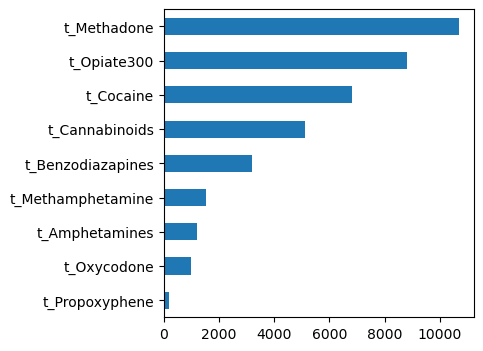

In [18]:
print('Count of Positive tests in descending order:')
display(u.groupby(['patdeid','VISIT']).sum().sum().sort_values(ascending=False).astype(np.int64))

# bar plot
u.groupby(['patdeid','VISIT']).sum().sum().sort_values(ascending=True).astype(np.int64).plot(kind='barh', figsize=(4,4));


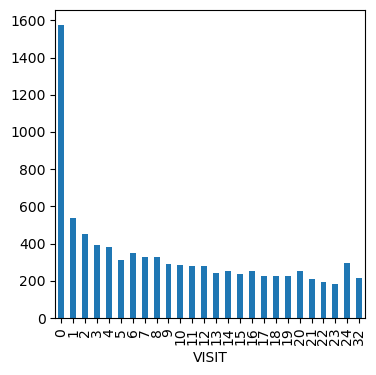

In [19]:
u.loc[u.t_Opiate300==1.0].groupby('VISIT').count().patdeid.plot(kind='bar', figsize=(4,4));

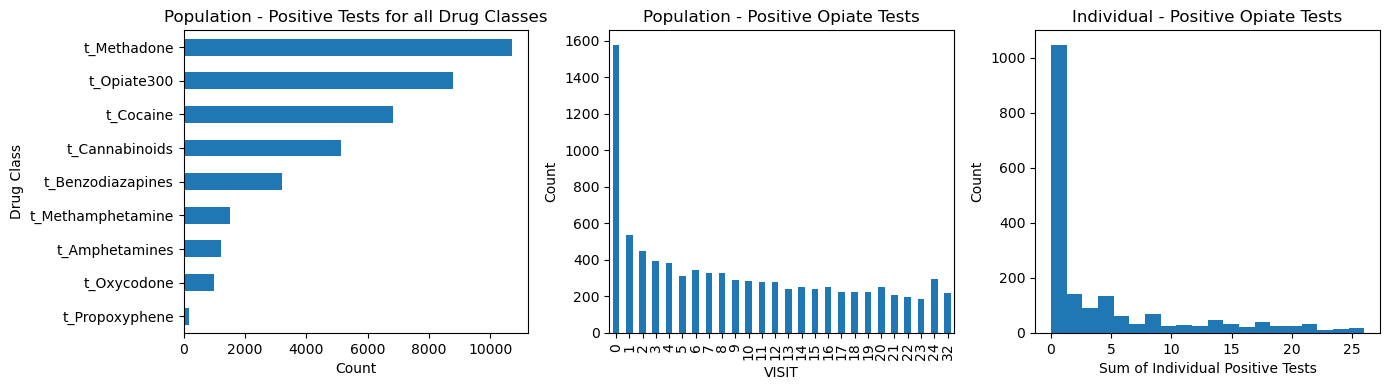

In [20]:
# create 2 plots next to each other
fig, ax = plt.subplots(1,3, figsize=(14,4))
u.groupby(['patdeid','VISIT']).sum().sum().sort_values(ascending=True).astype(np.int64).plot(kind='barh', ax=ax[0]);
u.loc[u.t_Opiate300==1.0].groupby('VISIT').count().patdeid.plot(kind='bar', ax=ax[1]);
u.groupby(['patdeid']).agg({'t_Opiate300':'sum'}).hist(ax=ax[2], bins=20, grid=False);
ax[0].set_title('Population - Positive Tests for all Drug Classes')
ax[1].set_title('Population - Positive Opiate Tests')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Drug Class')
ax[1].set_xlabel('VISIT')
ax[1].set_ylabel('Count')
ax[2].set_xlabel('Sum of Individual Positive Tests')
ax[2].set_ylabel('Count')
ax[2].set_title('Individual - Positive Opiate Tests')
plt.tight_layout();


In [21]:
u[:25]

,patdeid,VISIT,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,1,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# save data to csv

u.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/u_clean.csv')